### Linear Regression & Scikit-Learn Intro

This lab is designed to give everyone their first introduction to the Scikit-Learn API, and Linear Regression, one of the most commonly used techniques in predictive modeling.

During this lab you'll see if you can build a model, understand its working parts, and make improvements to your results!  

The great thing about `Scikit Learn` is that its API is almost identical from one algorithm to another, so once you get the hang of how to use it, using different methods is fairly seamless.

**Step 1:** Load in the `housing.csv` file

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('/Users/aoifeduna/DAT/DAT-01-21/Lectures/Unit3/data/housing.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


**Step 2:** What columns to include?  This is a bit of a topic unto itself, but for now let's keep it fairly simple, and choose the 5 columns that have the highest correlation (in magnitude) to the `PRICE` column. 

**hint:** `df.corr()`, and/or `sns.heatmap()` are helpful here.

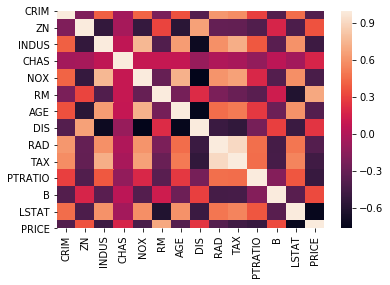

In [14]:
sns.heatmap(df.corr());

In [25]:
np.abs(df.corr()['PRICE']).sort_values(ascending=False)[1:6]
# Get the absolute values and the top 5 values not including the first value, which is price correlated to price

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
Name: PRICE, dtype: float64

**Step 3:** Declare your `X` & `y` variables

In [34]:
X = df[['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX']]
# Could save these as a variable to call them over and over again
Y = df['PRICE']

**Step 4:** Import `LinearRegression` and initialize it.

In [35]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Step 5:** Call the `fit()` method on `X` & `y`

In [36]:
lreg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Step 6:** Look at the values for `lreg.coef_` & `lreg.intercept_`

In [37]:
lreg.coef_

array([-5.59004744e-01,  4.62516926e+00, -8.76154330e-01,  5.69752124e-02,
       -3.53693090e-03])

In [39]:
lreg.intercept_

17.51771284955599

**Step 7:** Turn your model output into a more readable format.  

Try using the following:

  `coeff_dict = {'Column': X.columns, 'Weight': lreg.coef_}`
  
  `coeff = pd.DataFrame(coeff_dict)`

In [41]:
coeff_dict = {'Column': X.columns, 'Weight': lreg.coef_}
coeffs = pd.DataFrame(coeff_dict)
coeffs.sort_values(by='Weight', ascending=False)

,Column,Weight
1,RM,4.625169
3,INDUS,0.056975
4,TAX,-0.003537
0,LSTAT,-0.559005
2,PTRATIO,-0.876154


**Step 8:** Using the table you created in the previous step, what column had the largest coefficient (in magnitude)?

Does this mean it has the most predictive value of any column in your dataset? (We'll discuss this in class).

In [42]:
coeffs.sort_values(by='Weight', ascending=False).head(1)
# RM is the largest coefficient
# Depends. It might only have meaning in relationship to other variables

,Column,Weight
1,RM,4.625169


**Step 9:** What is your model's score? (We haven't really talked about what this means yet.  Don't worry, we'll get to that).

In [43]:
lreg.score(X, Y)

0.6804097741290724

**Step 10:** What is the equation of your model?

Ie, `y = coefval1 * RM + coefval2 * TAX + coefval3 * SomeColumnName + intercept`

In [44]:
y = 4.62 * RM + .05 * INDUS + -.003 * TAX + -.55 * LSTAT + -.087 * PTRATIO + 17.517

NameError: name 'RM' is not defined

**Step 11:** Make a column in your dataframe called `PREDICTION`, and make it the predicted values of each row in `X`.

In [46]:
df['PREDICTION'] = lreg.predict(X)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,PREDICTION
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,30.823877
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,26.057952
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,32.448095
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.196095
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,30.549224


**Step 12:** Looking at your first observation, can you make sense of the predicted value?  Ie, how it was generated from your coefficients & intercept?  If you're the type to do this, see if you can recreate the prediction using just your samples, coefficients and intercept.

In [50]:
np.sum(df[['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX']].head(1)*lreg.coef_, axis=1) + lreg.intercept_

0    30.823877
dtype: float64

#### Bonus

If you've made it this far, good job.  You can congratulate yourself for having duly completed the meat of today's lesson.  However, there are more details to discuss with these things, and these questions will give you a head's up on future points of attention.

**Bonus 1:** Data Scaling

The literal meaning of a coefficient is it's the expected change in `y` you would get by increasing its associated column's value by exactly 1.  

What's problematic about this definition is that most of the time data exists on different scales, making the meaning of your coefficients less clear.  

For example, the `TAX` column has a range of 200-800, and the `NOX` column has a range of 0.3-0.8.  Increasing the values in these columns by 1 will necessarily mean very different things since their scales are so different.  
To get around this, you typically scale your data before feeding it to a Linear Regression model (or anything else that uses coefficients). 

You accomplish this by taking every column and subtracting its mean from every value, and then dividing each value in a column by its standard deviation.  

You can do it like this:

`X = X - X.mean()`

`X = X / X.std()`

**a). Standardize Your Data, And Use the `Describe()` method to verify your results**

In [54]:
x = X - X.mean()
# You take every single column and subtract its average value from that column
# This makes the average value close to 0
X = X / X.std()
x.describe()

,LSTAT,RM,PTRATIO,INDUS,TAX
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-9.923990e-16,1.586785e-15,-3.301356e-14,-9.176673e-15,8.295516e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.529613e+00,-3.876413e+00,-2.704703e+00,-1.556302e+00,-1.312691e+00
25%,-7.986296e-01,-5.680681e-01,-4.875567e-01,-8.668328e-01,-7.668172e-01
50%,-1.810744e-01,-1.083583e-01,2.745872e-01,-2.108898e-01,-4.642132e-01
75%,6.024226e-01,4.822906e-01,8.057784e-01,1.014995e+00,1.529413e+00
max,3.545262e+00,3.551530e+00,1.637208e+00,2.420170e+00,1.796416e+00


**b). Refit your model on `X` and `y`, and look at your new coefficients.  Are they they the same or different?**

In [58]:
lreg.fit(X, Y)
lreg.coef_
# The coefficients are different

array([-3.99188726,  3.24972322, -1.8968264 ,  0.39087007, -0.59610413])

**c).  Look at your score.  Is it different?**

In [60]:
lreg.score(X, Y)
# The R2 is the same

0.6804097741290724

**d). What about your predictions?**

In [62]:
df['PREDICTION2'] = lreg.predict(X)
df.head()
# Predictions are the same as well

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,PREDICTION,PREDICTION2
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,30.823877,30.823877
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,26.057952,26.057952
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,32.448095,32.448095
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.196095,31.196095
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,30.549224,30.549224


**Bonus II: Basis Expansion**

The most common problem with Linear Regression models is that data is not always so linear.  Sometimes there are increasing returns to scale, diminishing returns, outliers, or erratic jump points that make your results untrustworthy.  

One common way to get around this is something called **basis expansion**, which is simply finding ways to capture irregular patterns in your data via different types of numeric transformations.  

In fact, lots of cutting edge techniques can be accurately framed as basis expansions on linear models.  

In this section, we'll see if we can find some low-hanging fruit in the columns that we currently have to perhaps better handle not-so-linear patterns. 

Here are some things you can try:

 - If the relationship between two columns looks like it's exponentially increasing or parabolic (bowl shaped), you can try raising the number to a higher power.  Ie, `df[col]**2 or df[col]**3`, etc.
 - If it looks like you are hitting diminishing returns you can try taking the square-root of a column and adding that to your mix of predictors
 - If a column looks like it's plagued by irregular values then you can use a log transformation `(np.log(df[col]))` to make it more numerically stable
 - If you think two columns (or more) had a multiplicative effect then you can try creating a new column that's the product of those columns multiplied together and use that in your regression.  These are called *interaction effects*.  Ie, do things like `CRIM` and `LSTAT` (socioeconomic status) reinforce one another?  If so, multiplying them together can capture their joint impact.
 
You could potentially do any of these to any columns in `X` or `y`.

With that said, try using either the `pairplot` or `regplot`, or some other data visualization tool to see if there's perhaps a higher order relationship to be captured.  If you see something that looks intriguing, add a new column to `X` that captures this relationship, re-run your regression, and see if your model score improved.

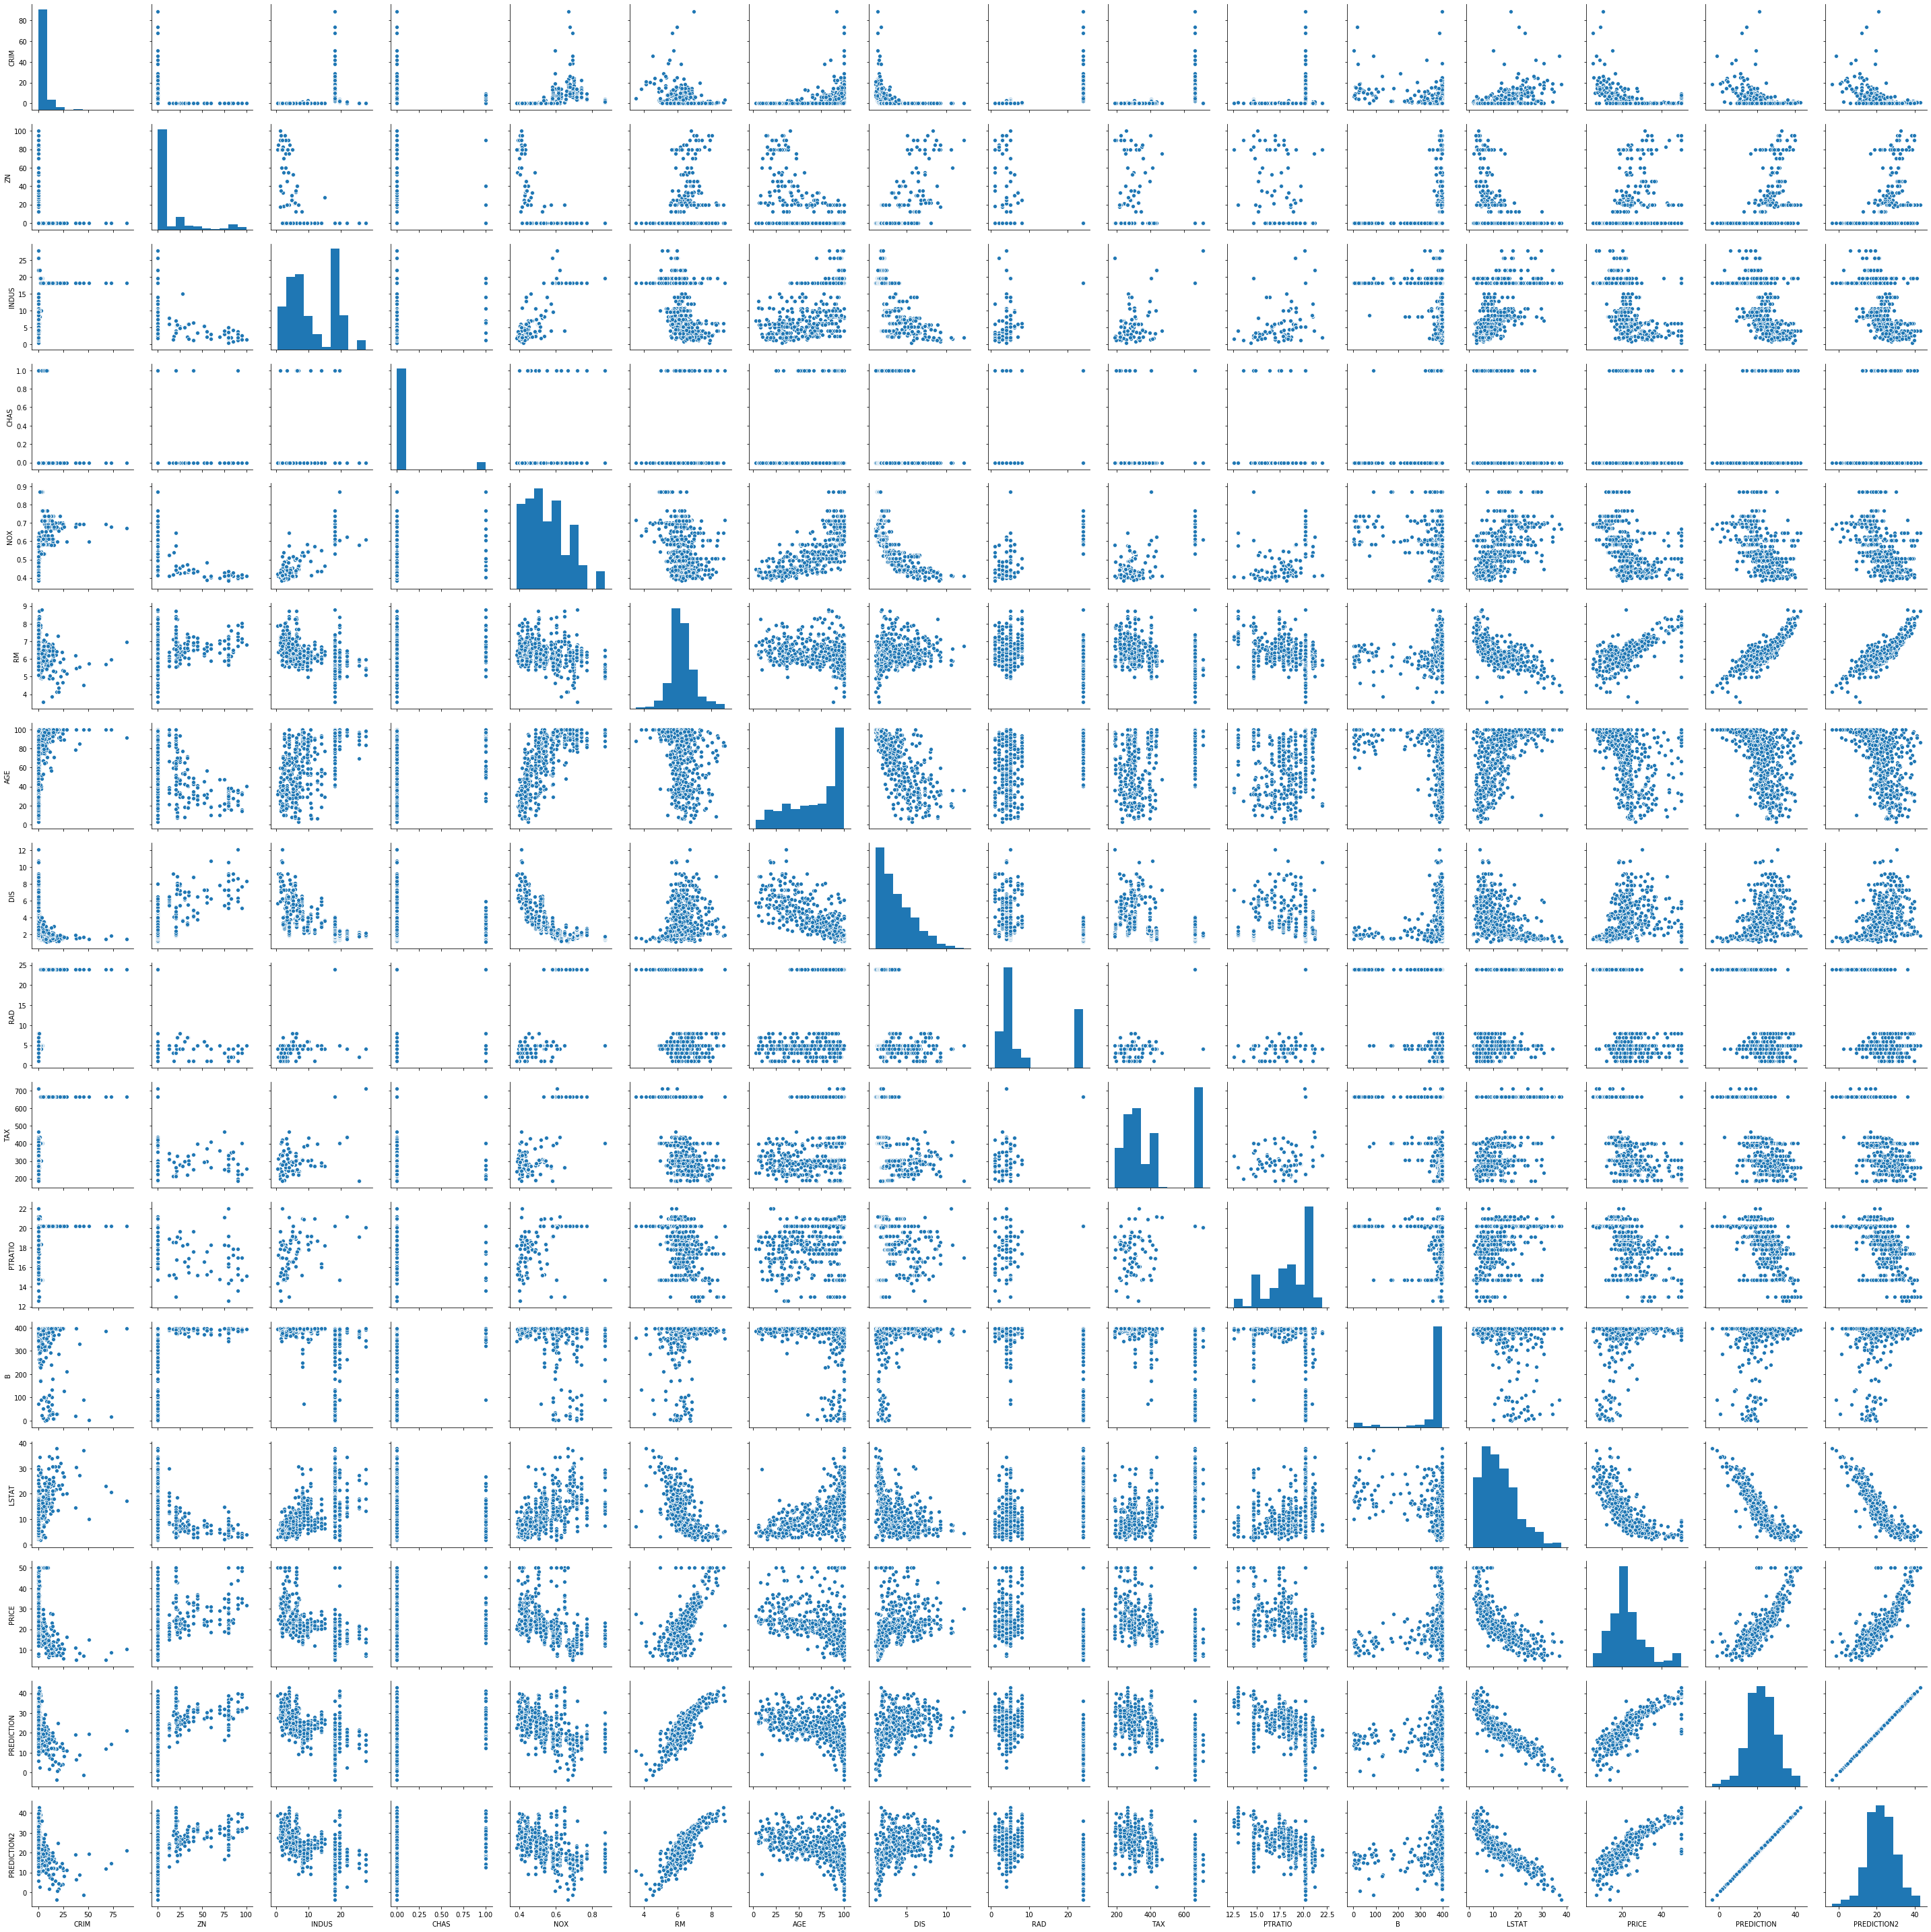

In [71]:
# Regularizaiton is a more modern approach to linear regression...
sns.pairplot(df)

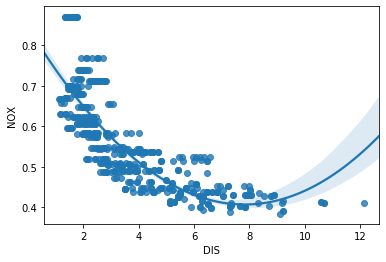

In [74]:
sns.regplot(x='DIS', y='NOX', order=2, data=df);

**Bonus III: Regularized Regression**

Many times you'll have a dataset that has many columns that are highly correlated, or just of dubious quality and you're better off excluding them from your model.  

In these circumstances, it can be difficult to get reliable results that replicate well to out-of-sample data, or reason about what to even include for your model.

Two common variants of common Linear Regression which help with these issues are **Ridge Regression** and **Lasso Regression**.  

They serve the same general purpose of reducing the impact of multicollinearity (highly correlated columns) and/or removal of low quality columns.  However, how they go about doing so is slightly different.

For now, let's just see how they work.

**Run the following cell to import Ridge and Lasso Regression**

In [77]:
# import the models here
from sklearn.linear_model import Ridge, Lasso
# These ones you need to scale your data first

**Initialize instances of both, and fit them on your data.**

In [83]:
ridge = Ridge()
lasso = Lasso()

In [84]:
ridge
ridge.fit(X, Y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [85]:
lasso
lasso.fit(X, Y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [86]:
lreg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Look at the values of your coefficients.  How are they different from regular Linear Regression?**

In [87]:
ridge.coef_

array([-3.98073675,  3.24729699, -1.89457005,  0.38146023, -0.59595601])

In [88]:
lasso.coef_

array([-3.62698295,  2.68460445, -1.35715355, -0.        , -0.        ])

In [94]:
lreg.coef_

array([-3.99188726,  3.24972322, -1.8968264 ,  0.39087007, -0.59610413])

If you look at the parameters of each one, you'll notice they have something called `alpha`.  This is a value that can go as low as 0 and has no upper limit.  

**Try changing the values of alpha for both Ridge and Lasso by multiples of 10, and notice what impact it has on your coefficients. (You can try values that are less than 1.  This is especially useful for Lasso, which is more sensitive to alpha than Ridge).**

In [106]:
ridgedf = pd.DataFrame(index=X.columns)
ridge.alpha = 10
ridge.fit(X, Y)
ridgedf['Alpha10'] = ridge.coef_
ridge.alpha = 100
ridge.fit(X, Y)
ridgedf['Alpha100'] = ridge.coef_
ridge.alpha = 1000
ridge.fit(X, Y)
ridgedf['Alpha1000'] = ridge.coef_
ridgedf.head()

,Alpha10,Alpha100,Alpha1000
LSTAT,-3.885149,-3.228219,-1.570089
RM,3.224500,2.960702,1.547645
PTRATIO,-1.874614,-1.705385,-0.991556
INDUS,0.301833,-0.187754,-0.676753
TAX,-0.595800,-0.640323,-0.690669


In [109]:
lassodf = pd.DataFrame(index=X.columns)
lasso.alpha = .001
lasso.fit(X, Y)
lassodf['Alpha.001'] = lasso.coef_
lasso.alpha = .01
lasso.fit(X, Y)
lassodf['Alpha.01'] = lasso.coef_
lasso.alpha = .1
lasso.fit(X, Y)
lassodf['Alpha.1'] = lasso.coef_
lassodf.head()

,Alpha.001,Alpha.01,Alpha.1
LSTAT,-3.990496,-3.978110,-3.872279
RM,3.248840,3.240913,3.166780
PTRATIO,-1.896287,-1.891530,-1.844944
INDUS,0.386247,0.344850,0.000000
TAX,-0.593034,-0.565423,-0.327382
